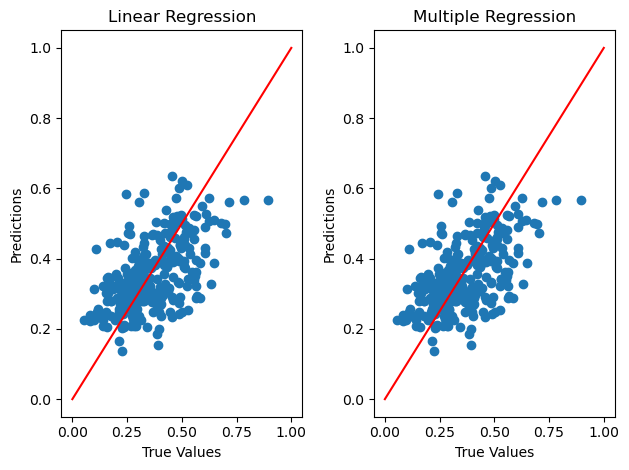

Linear Regression Accuracy: 46.38% (3.60%)
Multiple Regression Accuracy: 46.38% (3.60%)


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('pollution_life_withoutnan.csv')

# 원-핫 인코딩
encoded_df = pd.get_dummies(df, columns=['District'], dtype=int)

# 데이터 준비
X = encoded_df[['pm25', 'pm10', 'so2','o3', 'no2', 'co']]
y = encoded_df['AVG']
Districts = ['District_강원도', 'District_경기도',  'District_경상남도', 'District_경상북도', 'District_광주광역시',  'District_대구광역시',  'District_대전광역시',  'District_부산광역시',  'District_서울특별시', 'District_세종특별자치시',  'District_울산광역시',  'District_인천광역시',  'District_전라남도', 'District_전라북도',  'District_제주특별자치도',  'District_충청남도',  'District_충청북도'   ]

# Standard Scaling for X
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Concatenate Districts with X_scaled
X_scaled_with_districts = encoded_df[Districts].copy()
X_scaled_with_districts[X.columns] = X_scaled

# MinMax Scaling for y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

# Train/Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Multiple Linear Regression
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)

# 성능 평가
#mse_linear = mean_squared_error(y_test, y_pred_linear)
#r2_linear = r2_score(y_test, y_pred_linear)

#mse_multiple = mean_squared_error(y_test, y_pred_multiple)
#r2_multiple = r2_score(y_test, y_pred_multiple)

#print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")
#print(f"Multiple Regression MSE: {mse_multiple}, R2: {r2_multiple}")

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.plot([0, 1], [0, 1], color='red')

# Scatter plot for Multiple Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multiple)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Multiple Regression")
plt.plot([0, 1], [0, 1], color='red')

plt.tight_layout()
plt.show()

# K-Fold Cross Validation
kfold = KFold(n_splits=3, random_state=0, shuffle=True) # 밑에 왜 3개로 했느지 나와있음

# Apply k-Fold Cross Validation
results_linear = cross_val_score(linear_model, X_train, y_train, cv=kfold)
results_multiple = cross_val_score(multiple_model, X_train, y_train, cv=kfold)

# Print cross validation score
print("Linear Regression Accuracy: %.2f%% (%.2f%%)" % (results_linear.mean()*100, results_linear.std()*100))
print("Multiple Regression Accuracy: %.2f%% (%.2f%%)" % (results_multiple.mean()*100, results_multiple.std()*100))

In [6]:
# 최적의 하이퍼파라미터 K 값 찾기!! - 3이 젤 좋음
# List to store scores
scores_linear = []
scores_multiple = []

# K values to try
k_values = range(2, 21)

# For each K value...
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=k, random_state=0, shuffle=True)
    
    # Apply k-Fold Cross Validation
    result_linear = cross_val_score(linear_model, X_train, y_train, cv=kfold)
    result_multiple = cross_val_score(multiple_model, X_train, y_train, cv=kfold)
    
    # Record average accuracy
    scores_linear.append(result_linear.mean())
    scores_multiple.append(result_multiple.mean())

# Print the best K and its score for Linear Regression
best_k_linear = k_values[scores_linear.index(max(scores_linear))]
print(f"Best K for Linear Regression: {best_k_linear}, Accuracy: {max(scores_linear)*100:.2f}%")

# Print the best K and its score for Multiple Regression
best_k_multiple = k_values[scores_multiple.index(max(scores_multiple))]
print(f"Best K for Multiple Regression: {best_k_multiple}, Accuracy: {max(scores_multiple)*100:.2f}%")

Best K for Linear Regression: 3, Accuracy: 46.38%
Best K for Multiple Regression: 3, Accuracy: 46.38%


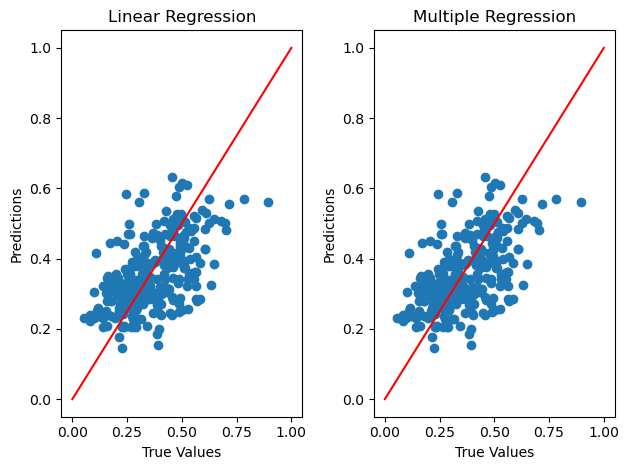

Linear Regression Accuracy: 46.73% (3.75%)
Multiple Regression Accuracy: 46.73% (3.75%)


In [7]:
#### 오존만 제외했을 때 #### 가장높음

df = pd.read_csv('pollution_life_withoutnan.csv')

# 원-핫 인코딩
encoded_df = pd.get_dummies(df, columns=['District'], dtype=int)

# 데이터 준비
X = encoded_df[['pm25', 'pm10','so2','no2', 'co']]
y = encoded_df['AVG']
Districts = ['District_강원도', 'District_경기도',  'District_경상남도', 'District_경상북도', 'District_광주광역시',  'District_대구광역시',  'District_대전광역시',  'District_부산광역시',  'District_서울특별시', 'District_세종특별자치시',  'District_울산광역시',  'District_인천광역시',  'District_전라남도', 'District_전라북도',  'District_제주특별자치도',  'District_충청남도',  'District_충청북도'   ]

# Standard Scaling for X
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Concatenate Districts with X_scaled
X_scaled_with_districts = encoded_df[Districts].copy()
X_scaled_with_districts[X.columns] = X_scaled

# MinMax Scaling for y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

# Train/Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Multiple Linear Regression
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)

# K-Fold Cross Validation
kfold = KFold(n_splits=3, random_state=0, shuffle=True)

# Apply k-Fold Cross Validation
results_linear = cross_val_score(linear_model, X_train, y_train, cv=kfold)
results_multiple = cross_val_score(multiple_model, X_train, y_train, cv=kfold)

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.plot([0, 1], [0, 1], color='red')

# Scatter plot for Multiple Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multiple)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Multiple Regression")
plt.plot([0, 1], [0, 1], color='red')

plt.tight_layout()
plt.show()

# Print cross validation score
print("Linear Regression Accuracy: %.2f%% (%.2f%%)" % (results_linear.mean()*100, results_linear.std()*100))
print("Multiple Regression Accuracy: %.2f%% (%.2f%%)" % (results_multiple.mean()*100, results_multiple.std()*100))

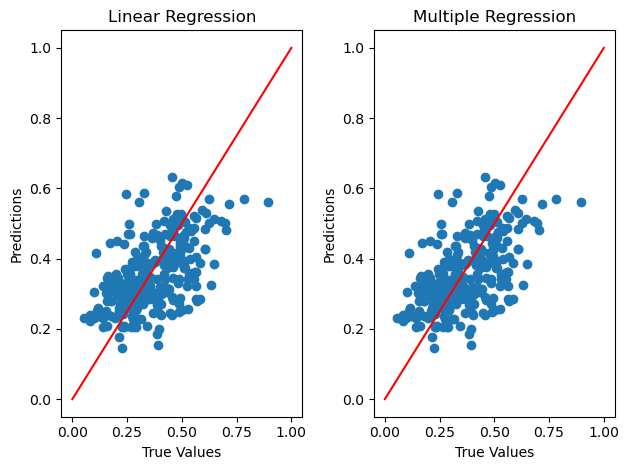

Linear Regression Accuracy: 46.73% (3.75%)
Multiple Regression Accuracy: 46.73% (3.75%)


In [20]:
####### 레벨 추가했을 때 #######

df = pd.read_csv('pollution_life_withoutnan.csv')

# One-Hot 인코딩
encoded_df = pd.get_dummies(df, columns=['District'], dtype=int)

# MinMax Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df[['pm25', 'pm10','so2','no2', 'co']]), columns=['pm25', 'pm10','so2','no2', 'co'])

# 데이터 binning
def binning(value, bins):
    for i in range(len(bins)-1):
        if value >= bins[i] and value <= bins[i+1]:
            return i
    return len(bins)-2

# 최적의 bin 계산 using Scott's rule
def calculate_optimal_bins(data, n_bins):
    std = np.std(data)
    n = len(data)
    bin_width = (3.5 * std) / (n**(1/3))
    min_value = np.min(data)
    max_value = np.max(data)
    bins = np.arange(min_value, max_value + bin_width, bin_width)
    bins = np.round(bins, decimals=6)
    bins = np.unique(bins)
    return np.histogram_bin_edges(data, bins=bins)

# Binning 구간 설정
pm25_bins = calculate_optimal_bins(scaled_df['pm25'], n_bins=3)
pm10_bins = calculate_optimal_bins(scaled_df['pm10'], n_bins=3)
so2_bins = calculate_optimal_bins(scaled_df['so2'], n_bins=3)
no2_bins = calculate_optimal_bins(scaled_df['no2'], n_bins=3)
co_bins = calculate_optimal_bins(scaled_df['co'], n_bins=3)

binned_df = pd.DataFrame()
binned_df['pm25_bin'] = scaled_df['pm25'].apply(lambda x: binning(x, pm25_bins))
binned_df['pm10_bin'] = scaled_df['pm10'].apply(lambda x: binning(x, pm10_bins))
binned_df['so2_bin'] = scaled_df['so2'].apply(lambda x: binning(x, so2_bins))
binned_df['no2_bin'] = scaled_df['no2'].apply(lambda x: binning(x, no2_bins))
binned_df['co_bin'] = scaled_df['co'].apply(lambda x: binning(x, co_bins))

# 원-핫 인코딩
encoded_binned_df = pd.get_dummies(binned_df, columns=['pm25_bin', 'pm10_bin', 'so2_bin', 'no2_bin', 'co_bin'], dtype=int)
encoded_binned_df['AVG'] = df['AVG']

# 데이터 준비
X = encoded_binned_df.drop('AVG', axis=1)
y = encoded_binned_df['AVG']
Districts = ['District_강원도', 'District_경기도', 'District_경상남도', 'District_경상북도', 'District_광주광역시', 'District_대구광역시', 'District_대전광역시', 'District_부산광역시', 'District_서울특별시', 'District_세종특별자치시', 'District_울산광역시', 'District_인천광역시', 'District_전라남도', 'District_전라북도', 'District_제주특별자치도', 'District_충청남도', 'District_충청북도']

# Concatenate Districts with encoded_X
encoded_X_with_districts = encoded_df[Districts].copy()
encoded_X_with_districts[X.columns] = X

# MinMax Scaling for y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

# Train/Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Multiple Linear Regression
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)

# K-Fold Cross Validation
kfold = KFold(n_splits=3, random_state=0, shuffle=True)

# Apply k-Fold Cross Validation
results_linear = cross_val_score(linear_model, X_train, y_train, cv=kfold)
results_multiple = cross_val_score(multiple_model, X_train, y_train, cv=kfold)

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.plot([0, 1], [0, 1], color='red')

# Scatter plot for Multiple Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multiple)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Multiple Regression")
plt.plot([0, 1], [0, 1], color='red')

plt.tight_layout()
plt.show()

# Print cross validation score
print("Linear Regression Accuracy: %.2f%% (%.2f%%)" % (results_linear.mean()*100, results_linear.std()*100))
print("Multiple Regression Accuracy: %.2f%% (%.2f%%)" % (results_multiple.mean()*100, results_multiple.std()*100))